In [56]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import scipy
from scipy.spatial import Delaunay
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True


C:\Users\Mark\AppData\Local\Temp\ipykernel_26724\3372451137.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


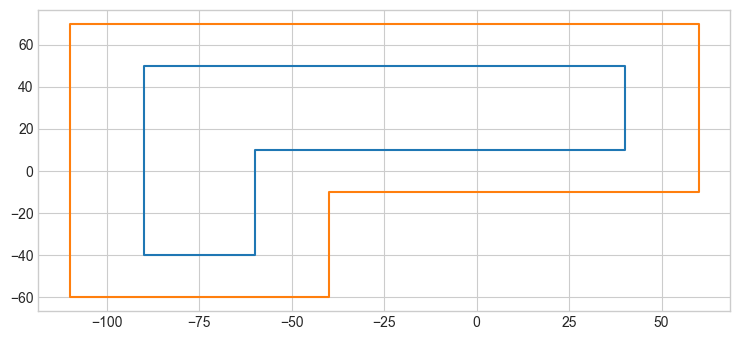

In [57]:
#define the course using left and right points

# left points
left_x_values = [-10, 40, 40, -90, -90, -60, -60, -10]
left_y_values = [10, 10, 50, 50, -40, -40, 10, 10]
leftPoints = [left_x_values, left_y_values]

#right points
right_x_values = [10, 60, 60, -110, -110, -40, -40, 10]
right_y_values = [-10, -10, 70, 70, -60, -60, -10, -10]
rightPoints = [right_x_values, right_y_values]



plt.plot(leftPoints[0], leftPoints[1], linestyle="solid")
plt.plot(rightPoints[0], rightPoints[1], linestyle="solid")
plt.show()

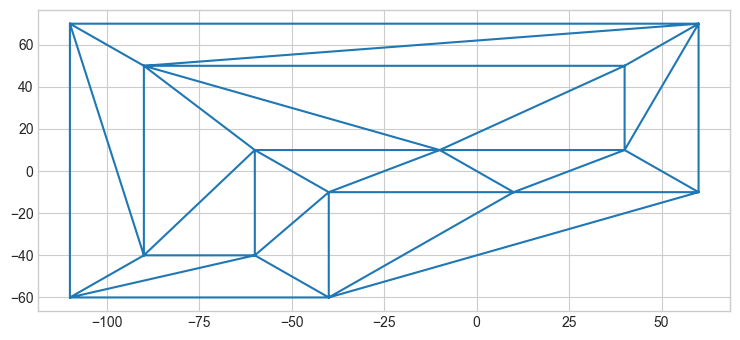

In [58]:
# create delaunay triangularization
combined_x = []
combined_x.extend(leftPoints[0])
combined_x.extend(rightPoints[0])

combined_y = []
combined_y.extend(leftPoints[1])
combined_y.extend(rightPoints[1])
points = []

for i in range(len(combined_x)):
    points.append([combined_x[i], combined_y[i]])

tri = Delaunay(points)

# print(tri.simplices)
plt.triplot(combined_x, combined_y, tri.simplices)
# plt.plot(combined_x, combined_y, 'o')
plt.show()

[ 6 14  0]
[14  8  0]


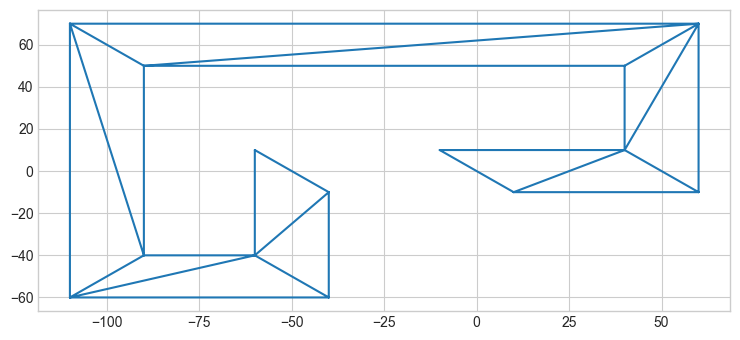

In [59]:
combined_x = []
combined_x.extend(leftPoints[0])
combined_x.extend(rightPoints[0])

combined_y = []
combined_y.extend(leftPoints[1])
combined_y.extend(rightPoints[1])
points = []

# checks if any elements in check array are in mainArray
def containsAny(mainArray, checkArray):
    for i in range(len(mainArray)):
        for j in range(len(checkArray)):
            if mainArray[i] == checkArray[j]:
                return True
    return False


for i in range(len(combined_x)):
    points.append([combined_x[i], combined_y[i]])
start = 0
goal = len(combined_x) - 2
tri = Delaunay(points)
tri = tri.simplices
track = []
for i in range(len(tri)):
    # checks if a triange is outside the track by seeing if all vertices are of solely left cones or solely right cones
    if containsAny(tri[i], range(len(leftPoints[0]))) and containsAny(tri[i], range(len(leftPoints[0]), len(leftPoints[0]) + len(rightPoints[0]))):
        if goal in tri[i] and start in tri[i]:
            print(tri[i])
        else:
            track.append(tri[i])

# print(tri.simplices)
plt.triplot(combined_x, combined_y, track)
# plt.plot(combined_x, combined_y, 'o')
plt.show()

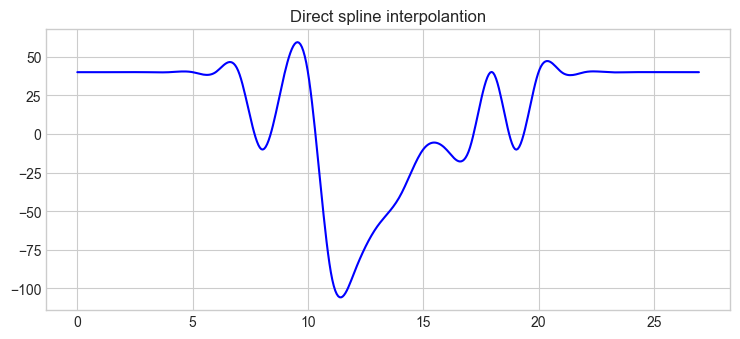

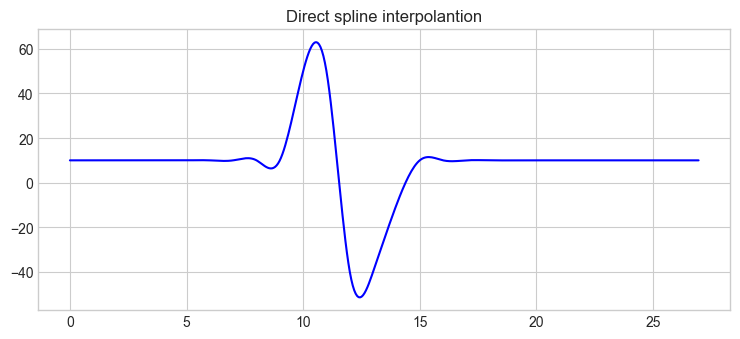

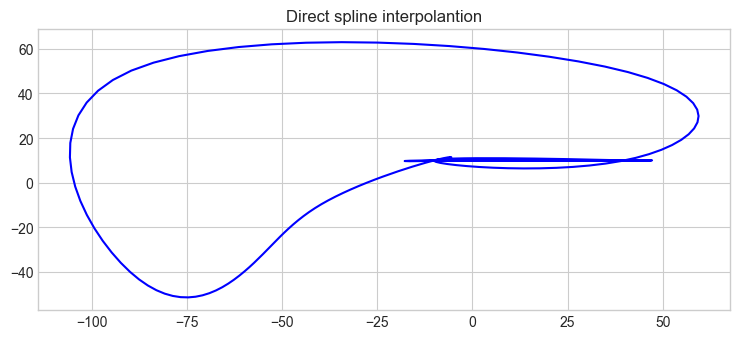

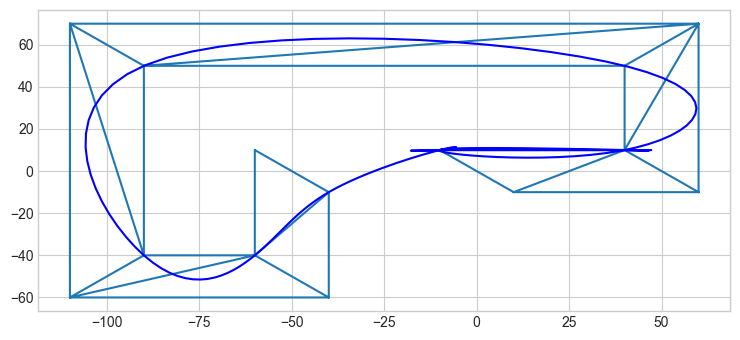

In [60]:
from scipy import interpolate
def interpolateAlgorithm(x, y):
        t = range(len(x))
        tck = interpolate.splrep(t, x, s=0)
        tfit = np.arange(0, len(x) - 1, np.pi/50)
        xfit = interpolate.splev(tfit, tck, der=0)

        # plt.plot(t, y, 'ro')
        plt.plot(tfit, xfit,'b')
        plt.title("Direct spline interpolantion")
        plt.show() 


        tck = interpolate.splrep(t, y, s=0)
        tfit = np.arange(0, len(y) - 1, np.pi/50)
        yfit = interpolate.splev(tfit, tck, der=0)

        # plt.plot(t, y, 'ro')
        plt.plot(tfit, yfit,'b')
        plt.title("Direct spline interpolantion")
        plt.show() 

        plt.plot(xfit, yfit,'b')
        plt.title("Direct spline interpolantion")
        plt.show() 
        return xfit, yfit



# xfit, yfit = interpolateAlgorithm(combined_x, combined_y)
# plt.triplot(combined_x, combined_y, track)
optimizedx.append(optimizedx[0])
optimizedx.insert(0, optimizedx[-2])
optimizedy.append(optimizedy[0])
optimizedy.insert(0, optimizedy[-2])
xfit, yfit = interpolateAlgorithm(optimizedx, optimizedy)
plt.triplot(combined_x, combined_y, track)
plt.plot(xfit, yfit, 'b')
plt.show()